In [1]:
# Load some relevant modules for this exercise
import postgkyl as pg
import matplotlib.pyplot as plt
import os
import numpy as np


## $u_{Stream}= \pm\ 5.0$

In [16]:
# Select which output step to load
step = np.arange(0, 501, 1)

for i in step:

    # Load electron distribution function data from a Gkeyll output file
    # This file was generated using a serendipity basis with poly_order = 2
    elc = pg.data.GData(f'/dartfs-hpc/rc/home/s/f005d7s/hw3/outputs_1/rt_vlasov_twostream_p2-elc_{i}.gkyl')

    # Set up modal-to-nodal interpolation of the distribution function
    # Arguments:
    #   - elc:        input Gkeyll data object
    #   - 2:          polynomial order used in the simulation (poly_order)
    #   - 'ms':       modal serendipity basis
    elc_Interp = pg.data.GInterpModal(elc, 2, 'ms')

    # Interpolate the modal data onto a uniform nodal grid
    # interpGrid_elc contains the phase-space grid coordinates
    # f_elc contains the interpolated distribution function values
    interpGrid_elc, f_elc = elc_Interp.interpolate()
    f_elc = f_elc[:, :, 0]

    fig = plt.figure(figsize=(8, 4), dpi=100, facecolor='white')
    ax = plt.subplot(111)

    ax.imshow(f_elc.T, extent=(interpGrid_elc[0][0], 
                               interpGrid_elc[0][-1], 
                               interpGrid_elc[1][0], 
                               interpGrid_elc[1][-1]), origin='lower', cmap='inferno')
    ax.set_aspect('auto')
    ax.set_title('Velocity Distribution Function:  step={}'.format(i))
    ax.set_xlabel(r'$x\ (c/\omega_{pe})$')
    ax.set_ylabel(r'$p_x\ (\gamma v_x/c)$')
    plt.savefig('velocity_distribution_function_1/step{}_vel_distn_fn.png'.format(i))
    plt.close()

In [11]:
# Select which output step to load
step = np.arange(0, 501, 1)
E_energy = []

for i in step:

    # Load electric field data from the Gkeyll output file
    # This file contains the DG representation of the electromagnetic field
    e = pg.data.GData(f'/dartfs-hpc/rc/home/s/f005d7s/hw3/outputs_1/rt_vlasov_twostream_p2-field_{i}.gkyl')

    # Set up the interpolator for the field data
    # As above:
    #   - poly_order = 2
    #   - 'ms' indicates a serendipity basis
    e_Interp = pg.data.GInterpModal(e, 2, 'ms')

    # Interpolate only component 0 of the field (Ex in 1D)
    # interpGrid contains the spatial grid
    # exs contains the interpolated electric field values
    interpGrid, exs = e_Interp.interpolate(0)

    # Drop the extra dimension so exs is a 1D array over space
    exs = exs[:, 0]

    # Construct cell-centered spatial grid from cell edge coordinates
    # interpGrid[0] contains the x-grid edges
    ex_grid = (interpGrid[0][1:] + interpGrid[0][:-1]) / 2

    # Compute the grid spacing dx (uniform grid assumed)
    dx = np.diff(ex_grid)[0]

    U_E = 0.5 * np.sum(exs**2) * dx
    E_energy.append(U_E)

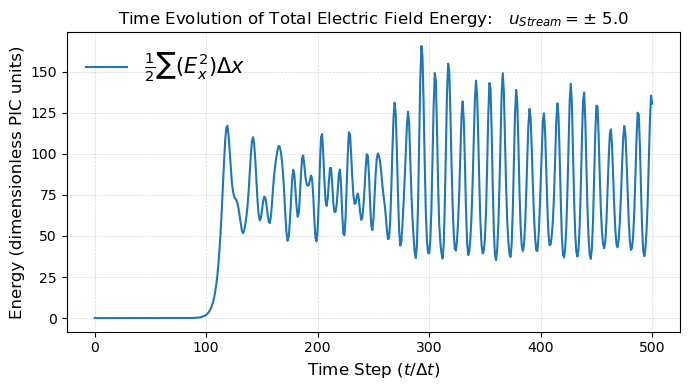

In [13]:
plt.figure(figsize=(7, 4))
plt.plot(step, E_energy, label=r'$\frac{1}{2} \sum (E_{x}^2) \Delta x$')
plt.xlabel(r'Time Step $(t/ \Delta t)$', fontsize=12)
plt.ylabel(r'Energy (dimensionless PIC units)', fontsize=12)
plt.title('Time Evolution of Total Electric Field Energy:   $u_{Stream}= \pm\ 5.0$', fontsize=12)
plt.legend(frameon=False, fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.savefig('E-field_energy_1.png')
plt.show()

## $u_{Stream}= \pm\ 0.5$

In [3]:
# Select which output step to load
step = np.arange(0, 501, 1)

for i in step:

    # Load electron distribution function data from a Gkeyll output file
    # This file was generated using a serendipity basis with poly_order = 2
    elc = pg.data.GData(f'/dartfs-hpc/rc/home/s/f005d7s/hw3/outputs_2/rt_vlasov_twostream_p2_2-elc_{i}.gkyl')

    # Set up modal-to-nodal interpolation of the distribution function
    # Arguments:
    #   - elc:        input Gkeyll data object
    #   - 2:          polynomial order used in the simulation (poly_order)
    #   - 'ms':       modal serendipity basis
    elc_Interp = pg.data.GInterpModal(elc, 2, 'ms')

    # Interpolate the modal data onto a uniform nodal grid
    # interpGrid_elc contains the phase-space grid coordinates
    # f_elc contains the interpolated distribution function values
    interpGrid_elc, f_elc = elc_Interp.interpolate()
    f_elc = f_elc[:, :, 0]

    fig = plt.figure(figsize=(8, 4), dpi=100, facecolor='white')
    ax = plt.subplot(111)

    ax.imshow(f_elc.T, extent=(interpGrid_elc[0][0], 
                               interpGrid_elc[0][-1], 
                               interpGrid_elc[1][0], 
                               interpGrid_elc[1][-1]), origin='lower', cmap='inferno')
    ax.set_aspect('auto')
    ax.set_title('Velocity Distribution Function:  step={}'.format(i))
    ax.set_xlabel(r'$x\ (c/\omega_{pe})$')
    ax.set_ylabel(r'$p_x\ (\gamma v_x/c)$')
    plt.savefig('velocity_distribution_function_2/step{}_vel_distn_fn.png'.format(i))
    plt.close()

In [4]:
# Select which output step to load
step = np.arange(0, 501, 1)
E_energy = []

for i in step:

    # Load electric field data from the Gkeyll output file
    # This file contains the DG representation of the electromagnetic field
    e = pg.data.GData(f'/dartfs-hpc/rc/home/s/f005d7s/hw3/outputs_2/rt_vlasov_twostream_p2_2-field_{i}.gkyl')

    # Set up the interpolator for the field data
    # As above:
    #   - poly_order = 2
    #   - 'ms' indicates a serendipity basis
    e_Interp = pg.data.GInterpModal(e, 2, 'ms')

    # Interpolate only component 0 of the field (Ex in 1D)
    # interpGrid contains the spatial grid
    # exs contains the interpolated electric field values
    interpGrid, exs = e_Interp.interpolate(0)

    # Drop the extra dimension so exs is a 1D array over space
    exs = exs[:, 0]

    # Construct cell-centered spatial grid from cell edge coordinates
    # interpGrid[0] contains the x-grid edges
    ex_grid = (interpGrid[0][1:] + interpGrid[0][:-1]) / 2

    # Compute the grid spacing dx (uniform grid assumed)
    dx = np.diff(ex_grid)[0]

    U_E = 0.5 * np.sum(exs**2) * dx
    E_energy.append(U_E)

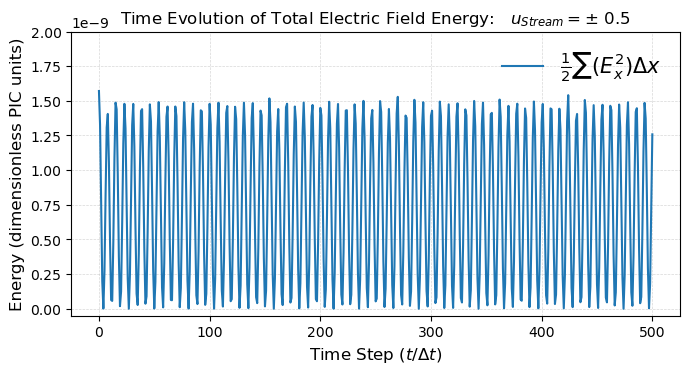

In [12]:
plt.figure(figsize=(7, 4))
plt.plot(step, E_energy, label=r'$\frac{1}{2} \sum (E_{x}^2) \Delta x$')
plt.ylim(-0.05e-9,2e-9)
plt.xlabel(r'Time Step $(t/ \Delta t)$', fontsize=12)
plt.ylabel(r'Energy (dimensionless PIC units)', fontsize=12)
plt.title('Time Evolution of Total Electric Field Energy:   $u_{Stream}= \pm\ 0.5$', fontsize=12)
plt.legend(loc='upper right', frameon=False, fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.savefig('E-field_energy_2.png')
plt.show()

### 1G) For the case $u_{stream} = \pm\ 5$ reduce both the spatial and velocity-space resolution by a factor of two. Compare the results with the higher-resolution simulation. Briefly discuss how reduced resolution affects phase-space structure and energy evolution.

    Modified .lua file as follows:

    Nx = 32 -- Cell count (configuration space: x-direction). --> Halved from 64 to 32
    Nvx = 16 -- Cell count (velocity space: vx-direction). --> Halved from 64 to 32
    Lx = 20.0 * pi * lambda_D -- Domain size (configuration space: x-direction). --> Unchanged
    vx_max = 24.0 * vt -- Domain boundary (velocity space: vx-direction). --> Unchanged

In [2]:
# Select which output step to load
step = np.arange(0, 501, 1)

for i in step:

    # Load electron distribution function data from a Gkeyll output file
    # This file was generated using a serendipity basis with poly_order = 2
    elc = pg.data.GData(f'/dartfs-hpc/rc/home/s/f005d7s/hw3/outputs_3/rt_vlasov_twostream_p2_3-elc_{i}.gkyl')

    # Set up modal-to-nodal interpolation of the distribution function
    # Arguments:
    #   - elc:        input Gkeyll data object
    #   - 2:          polynomial order used in the simulation (poly_order)
    #   - 'ms':       modal serendipity basis
    elc_Interp = pg.data.GInterpModal(elc, 2, 'ms')

    # Interpolate the modal data onto a uniform nodal grid
    # interpGrid_elc contains the phase-space grid coordinates
    # f_elc contains the interpolated distribution function values
    interpGrid_elc, f_elc = elc_Interp.interpolate()
    f_elc = f_elc[:, :, 0]

    fig = plt.figure(figsize=(8, 4), dpi=100, facecolor='white')
    ax = plt.subplot(111)

    ax.imshow(f_elc.T, extent=(interpGrid_elc[0][0], 
                               interpGrid_elc[0][-1], 
                               interpGrid_elc[1][0], 
                               interpGrid_elc[1][-1]), origin='lower', cmap='inferno')
    ax.set_aspect('auto')
    ax.set_title('Velocity Distribution Function:  step={}'.format(i))
    ax.set_xlabel(r'$x\ (c/\omega_{pe})$')
    ax.set_ylabel(r'$p_x\ (\gamma v_x/c)$')
    plt.savefig('velocity_distribution_function_3/step{}_vel_distn_fn.png'.format(i))
    plt.close()

In [3]:
# Select which output step to load
step = np.arange(0, 501, 1)
E_energy = []

for i in step:

    # Load electric field data from the Gkeyll output file
    # This file contains the DG representation of the electromagnetic field
    e = pg.data.GData(f'/dartfs-hpc/rc/home/s/f005d7s/hw3/outputs_3/rt_vlasov_twostream_p2_3-field_{i}.gkyl')

    # Set up the interpolator for the field data
    # As above:
    #   - poly_order = 2
    #   - 'ms' indicates a serendipity basis
    e_Interp = pg.data.GInterpModal(e, 2, 'ms')

    # Interpolate only component 0 of the field (Ex in 1D)
    # interpGrid contains the spatial grid
    # exs contains the interpolated electric field values
    interpGrid, exs = e_Interp.interpolate(0)

    # Drop the extra dimension so exs is a 1D array over space
    exs = exs[:, 0]

    # Construct cell-centered spatial grid from cell edge coordinates
    # interpGrid[0] contains the x-grid edges
    ex_grid = (interpGrid[0][1:] + interpGrid[0][:-1]) / 2

    # Compute the grid spacing dx (uniform grid assumed)
    dx = np.diff(ex_grid)[0]

    U_E = 0.5 * np.sum(exs**2) * dx
    E_energy.append(U_E)

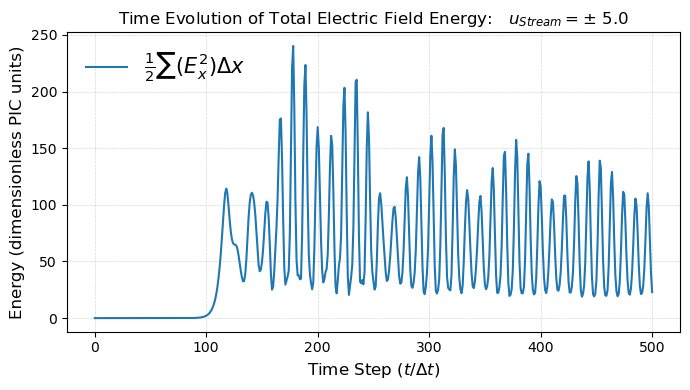

In [4]:
plt.figure(figsize=(7, 4))
plt.plot(step, E_energy, label=r'$\frac{1}{2} \sum (E_{x}^2) \Delta x$')
#plt.ylim(-0.05e-9,2e-9)
plt.xlabel(r'Time Step $(t/ \Delta t)$', fontsize=12)
plt.ylabel(r'Energy (dimensionless PIC units)', fontsize=12)
plt.title('Time Evolution of Total Electric Field Energy:   $u_{Stream}= \pm\ 5.0$', fontsize=12)
plt.legend(loc='upper left', frameon=False, fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.savefig('E-field_energy_3.png')
plt.show()